In [1]:
import pickle
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot  as plt
import FinanceDataReader as fdr
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings(action='ignore')

In [2]:
# 확인하면 되는 것들
std_date = '20221018'
N = 1000

DATA_PATH = f'./db_and_model/stock_data_{std_date}_{N}.csv'

In [3]:
def date_add(date, month):
    '''date에 month만큼 더해준다. date는 20210102와 같은 꼴이나 datetime type으로 입력한다.'''
    if type(date) == str: # date가 datetime이 아니라 str 타입으로 들어온 경우
        date = datetime.strptime(date, '%Y%m%d')
    delta = timedelta(days=month*30.5)
    return date + delta

def earning_rate(stock_price : list, start_date, end_date):
    '''start_date부터 end_date까지 stock_price데이터를 가지고 수익률을 구해주는 함수(종가 기준)'''
    possible_start_date = stock_price[stock_price.index >= start_date].index[0]
    possible_end_date = stock_price[stock_price.index <= end_date].index[-1]
    
    start_price = stock_price.loc[possible_start_date].Close
    end_price = stock_price.loc[possible_end_date].Close
    
    return (end_price - start_price) / start_price

def preprocess(data_path):
    """데이터 불러오기 + 전처리"""
    # raw_data = pd.read_csv(data_path, encoding='cp949')
    raw_data = pd.read_csv(data_path)
    raw_data.drop(raw_data[raw_data['PER'] == 0].index, inplace=True) # PER 0인 종목 제외
    raw_data.drop(raw_data[raw_data['PBR'] == 0].index, inplace=True) # PBR 0인 종목 제외

    return raw_data.reset_index()

def pred(data_path=DATA_PATH):
    raw_data = preprocess(data_path)

    col_names = ["12개월 간 수익률", "KOSPI대비 12개월 간 수익률" , "12개월 간 KOSPI 이김" , 'PER_inv' , 'PBR_inv' , "배당수익률"]
    X = raw_data[col_names]

    MODEL_FILEPATH = './db_and_model/stock_pred_model.pkl'
    with open(MODEL_FILEPATH, 'rb') as pickle_file:
        stock_pred_model = pickle.load(pickle_file)

    y = stock_pred_model.predict_proba(X)[:, 1]
    y = pd.DataFrame(y, columns=['y'])

    # 결과 dataFrame
    res = raw_data.copy()
    res['y'] = y.values

    return res

res = pred()

top_stocks = res.sort_values(by='y', ascending=False).head(50)

top_stocks.head(50)

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
956,977,977,20221018,019440,0.184848,세아특수강,-0.251683,0.436531,1,6.25,0.50,6.14,0.160000,2.000000,0.814528
97,98,98,20221018,001450,0.153982,현대해상,-0.251683,0.405665,1,6.17,0.51,4.54,0.162075,1.960784,0.814349
741,757,757,20221018,010955,-0.120556,S-Oil우,-0.251683,0.131127,1,10000.00,10000.00,6.72,0.000100,0.000100,0.798650
389,395,395,20221018,000815,-0.135734,삼성화재우,-0.251683,0.115949,1,10000.00,10000.00,7.70,0.000100,0.000100,0.784290
35,35,35,20221018,030200,0.134185,KT,-0.251683,0.385868,1,6.16,0.56,5.38,0.162338,1.785714,0.781584
242,245,245,20221018,003690,-0.255767,코리안리,-0.251683,-0.004084,0,5.21,0.30,7.08,0.191939,3.333333,0.775205
73,74,74,20221018,004990,0.167421,롯데지주,-0.251683,0.419104,1,8.97,0.40,3.88,0.111483,2.500000,0.773907
816,834,834,20221018,008060,-0.165301,대덕,-0.251683,0.086382,1,10000.00,0.36,4.91,0.000100,2.777778,0.770841
913,933,933,20221018,004560,-0.355978,현대비앤지스틸,-0.251683,-0.104295,0,2.58,0.36,0.84,0.387597,2.777778,0.765123
99,100,100,20221018,005387,-0.210000,현대차2우B,-0.251683,0.041683,1,10000.00,10000.00,6.46,0.000100,0.000100,0.762878


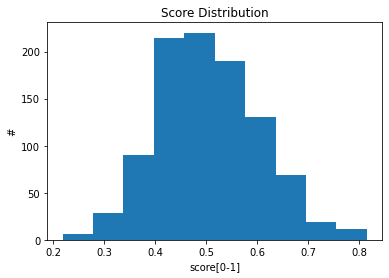

In [4]:
fig = plt.figure()
plt.hist(res['y'])
plt.title('Score Distribution')
plt.xlabel('score[0-1]')
plt.ylabel('#')
plt.show()

In [5]:
top_stocks = res.sort_values(by='y', ascending=False).head(50)

end_date = date_add(date=std_date, month=6) # std_date에 month 이후

stock_price_dic = {}

for code in top_stocks.code:
    stock_price_dic[code] = fdr.DataReader(code, start=std_date)

er_list = []
for code in top_stocks.code:
    er = earning_rate(stock_price_dic[code], start_date=std_date, end_date=end_date)
    er_list.append(er)

top_stocks['수익률'] = er_list

print('수익률 : {:.4f}%'.format(top_stocks['수익률'].mean()*100))
top_stocks.head(50)

수익률 : 0.0000%


,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y,수익률
956,977,977,20221018,019440,0.184848,세아특수강,-0.251683,0.436531,1,6.25,0.50,6.14,0.160000,2.000000,0.814528,0.0
97,98,98,20221018,001450,0.153982,현대해상,-0.251683,0.405665,1,6.17,0.51,4.54,0.162075,1.960784,0.814349,0.0
741,757,757,20221018,010955,-0.120556,S-Oil우,-0.251683,0.131127,1,10000.00,10000.00,6.72,0.000100,0.000100,0.798650,0.0
389,395,395,20221018,000815,-0.135734,삼성화재우,-0.251683,0.115949,1,10000.00,10000.00,7.70,0.000100,0.000100,0.784290,0.0
35,35,35,20221018,030200,0.134185,KT,-0.251683,0.385868,1,6.16,0.56,5.38,0.162338,1.785714,0.781584,0.0
242,245,245,20221018,003690,-0.255767,코리안리,-0.251683,-0.004084,0,5.21,0.30,7.08,0.191939,3.333333,0.775205,0.0
73,74,74,20221018,004990,0.167421,롯데지주,-0.251683,0.419104,1,8.97,0.40,3.88,0.111483,2.500000,0.773907,0.0
816,834,834,20221018,008060,-0.165301,대덕,-0.251683,0.086382,1,10000.00,0.36,4.91,0.000100,2.777778,0.770841,0.0
913,933,933,20221018,004560,-0.355978,현대비앤지스틸,-0.251683,-0.104295,0,2.58,0.36,0.84,0.387597,2.777778,0.765123,0.0
99,100,100,20221018,005387,-0.210000,현대차2우B,-0.251683,0.041683,1,10000.00,10000.00,6.46,0.000100,0.000100,0.762878,0.0


In [6]:
# 금융주, 지주 회사 제외 테스트
condition = ~(res.name.str.contains('지주') | res.name.str.contains('홀딩스')
    | res.name.str.contains('은행') | res.name.str.contains('금융') | res.name.str.contains('보험')
     | res.name.str.contains('증권') | res.name.str.contains('생명'))

top_stocks2 = res[condition].sort_values(by='y', ascending=False).head(50)

end_date = date_add(date=std_date, month=6) # std_date에 month 이후

stock_price_dic = {}

for code in top_stocks2.code:
    stock_price_dic[code] = fdr.DataReader(code, start=std_date)

er_list = []
for code in top_stocks2.code:
    er = earning_rate(stock_price_dic[code], start_date=std_date, end_date=end_date)
    er_list.append(er)

top_stocks2['수익률'] = er_list

print('수익률 : {:.4f}%'.format(top_stocks2['수익률'].mean()*100))
top_stocks2.head(50)

수익률 : 0.0000%


,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y,수익률
956,977,977,20221018,019440,0.184848,세아특수강,-0.251683,0.436531,1,6.25,0.50,6.14,0.160000,2.000000,0.814528,0.0
97,98,98,20221018,001450,0.153982,현대해상,-0.251683,0.405665,1,6.17,0.51,4.54,0.162075,1.960784,0.814349,0.0
741,757,757,20221018,010955,-0.120556,S-Oil우,-0.251683,0.131127,1,10000.00,10000.00,6.72,0.000100,0.000100,0.798650,0.0
389,395,395,20221018,000815,-0.135734,삼성화재우,-0.251683,0.115949,1,10000.00,10000.00,7.70,0.000100,0.000100,0.784290,0.0
35,35,35,20221018,030200,0.134185,KT,-0.251683,0.385868,1,6.16,0.56,5.38,0.162338,1.785714,0.781584,0.0
242,245,245,20221018,003690,-0.255767,코리안리,-0.251683,-0.004084,0,5.21,0.30,7.08,0.191939,3.333333,0.775205,0.0
816,834,834,20221018,008060,-0.165301,대덕,-0.251683,0.086382,1,10000.00,0.36,4.91,0.000100,2.777778,0.770841,0.0
913,933,933,20221018,004560,-0.355978,현대비앤지스틸,-0.251683,-0.104295,0,2.58,0.36,0.84,0.387597,2.777778,0.765123,0.0
99,100,100,20221018,005387,-0.210000,현대차2우B,-0.251683,0.041683,1,10000.00,10000.00,6.46,0.000100,0.000100,0.762878,0.0
139,140,140,20221018,005385,-0.208417,현대차우,-0.251683,0.043266,1,10000.00,10000.00,6.39,0.000100,0.000100,0.761342,0.0


-1.9805692009306781

수익률 : -1.9806%
